<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/DeepLearning/KHF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Python nyelven olvass be öt darab tetszőleges 256x256 pixeles színes képet, jelenítsd meg és jelenítsd meg külön az R, G és B csatornák értékeit hisztogramon. (4p)
2. Csatornánként számold ki a pixelek átlagát és szórását minden képre, majd alakítsd át ezeket 0 várható értékű, 1 szórású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
3. Olvass be két tetszőleges hangfájlt és jelenítsd meg ezek spektrogramját. (4p)
4. Alakítsd át a spektogramokat 0 várható értékű és 1 szorású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
5. Python scriptből töltsd le a http://smartlab.tmit.bme.hu/oktatas-deep-learning oldal szöveges tartalmát, jelenítsd meg a szöveges tartalmat, továbbá hisztogramon jelenítsd meg a tartalomban a betűk előfordulásának gyakoriságát. (4p)

Importing libraries

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import librosa

Downloading the images

In [3]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/nature.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/rdr2.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/Magnus.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/drums.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/Craftingtable.png

--2024-10-01 06:59:18--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/nature.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19266 (19K) [image/jpeg]
Saving to: ‘nature.jpg’

nature.jpg          100%[===================>]  18.81K  --.-KB/s    in 0s      

2024-10-01 06:59:18 (95.5 MB/s) - ‘nature.jpg’ saved [19266/19266]

--2024-10-01 06:59:19--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/rdr2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110288 (1

Exercise 1

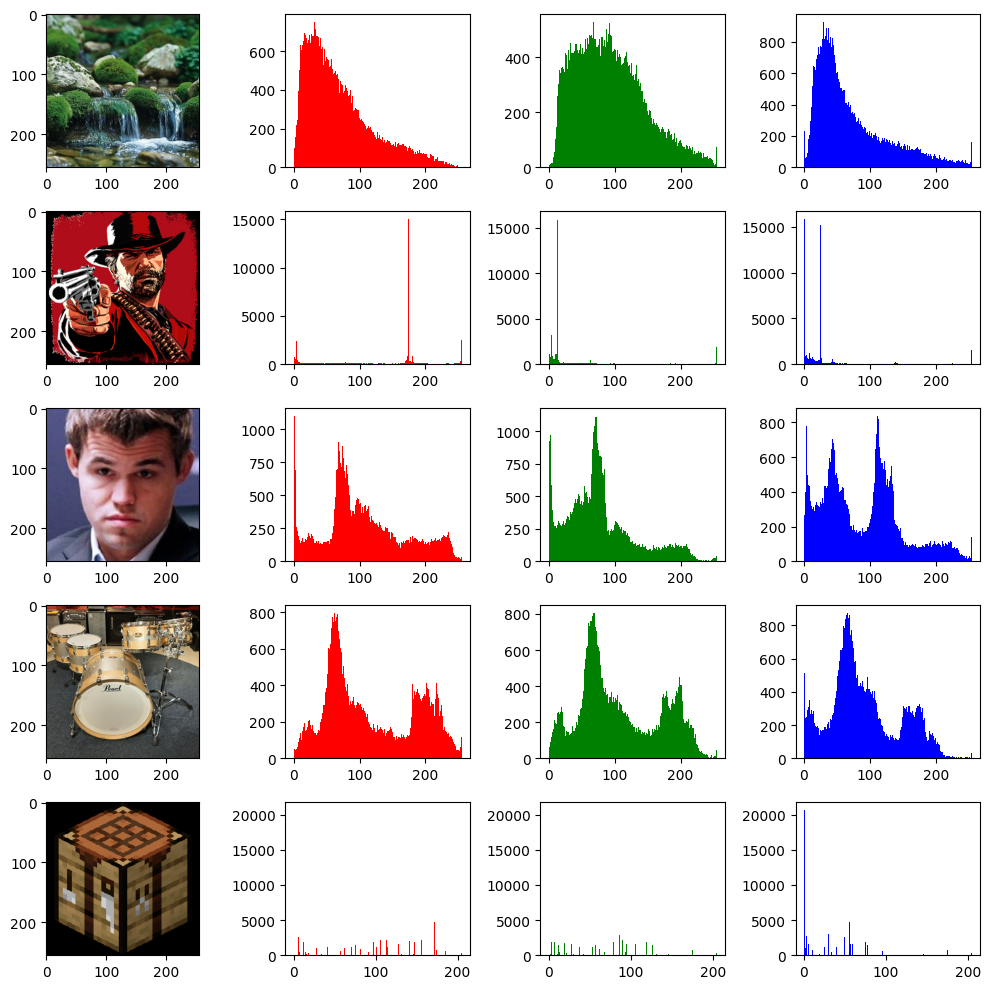

In [4]:
# Reading the images
img1 = cv2.imread("nature.jpg")
img2 = cv2.imread("rdr2.png")
img3 = cv2.imread("Magnus.jpg")
img4 = cv2.imread("drums.png")
img5 = cv2.imread("Craftingtable.png")

# Converting BGR to RGB
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Creating array so we can iterate trough the images
imgs = [img1_rgb, img2_rgb, img3_rgb, img4_rgb, img5_rgb]

# Creating a 5x4 board
fig, axs = plt.subplots(5, 4, figsize=(10, 10))

for i, img in enumerate(imgs):
  # Drawing the image
  axs[i, 0].imshow(img)

  # Getting the red, green and bloe channel values
  red = img[:, :, 0].flatten()
  green = img[:, :, 1].flatten()
  blue = img[:, :, 2].flatten()

  # Drawing the 3 histograms
  axs[i, 1].hist(red, bins=256, color='red')
  axs[i, 2].hist(green, bins=256, color='green')
  axs[i, 3].hist(blue, bins=256, color='blue')

plt.tight_layout()
plt.show()

Exercise 2

In [18]:
# Calculating mean and standard deviation, than normalizing (or rather standardizing)
def normalize(channel):
  mean = np.mean(channel)
  std = np.std(channel)
  normalized = (channel - mean) / std
  return normalized, mean, std

for i, img in enumerate(imgs):
    # Normalizing each channel
    red_norm, red_mean, red_std = normalize(img[:, :, 0])
    green_norm, green_mean, green_std = normalize(img[:, :, 1])
    blue_norm, blue_mean, blue_std = normalize(img[:, :, 2])

    # Combine normalized channels back into an image
    img_norm = np.stack([red_norm, green_norm, blue_norm], axis=2)

    # Checking the mean and std of the normalized data
    print(f"Image {i+1} Original values: red_mean: {red_mean}, green_mean: {green_mean}, blue_mean: {blue_mean}")
    print(f"Image {i+1} Original values: red_std: {red_std}, green_std: {green_std}, blue_std: {blue_std}")
    print(f"Image {i+1} - Normalized means: {np.mean(img_norm, axis=(0,1))}, stds: {np.std(img_norm, axis=(0,1))}")

Image 1 Original values: red_mean: 69.63026428222656, green_mean: 94.030029296875, blue_mean: 72.02841186523438
Image 1 Original values: red_std: 52.09517995812204, green_std: 53.129545833534635, blue_std: 55.243862601373465
Image 1 - Normalized means: [-1.38039265e-15 -7.11070607e-16  2.48478809e-15], stds: [1. 1. 1.]
Image 2 Original values: red_mean: 108.29450988769531, green_mean: 36.87315368652344, blue_mean: 36.48457336425781
Image 2 Original values: red_std: 87.92088096106633, green_std: 64.95888880359422, blue_std: 59.74445274538115
Image 2 - Normalized means: [6.21468954e-14 1.46571259e-14 2.68596180e-14], stds: [1. 1. 1.]
Image 3 Original values: red_mean: 105.93922424316406, green_mean: 78.44171142578125, blue_mean: 89.12570190429688
Image 3 Original values: red_std: 62.471689013949536, green_std: 52.81395085979301, blue_std: 59.596113837065545
Image 3 - Normalized means: [-4.97367582e-15 -6.29968896e-16 -1.42267654e-17], stds: [1. 1. 1.]
Image 4 Original values: red_mean: 1

The results show, that after normalization the mean of each channel is (technically) 0, and the standard deviation is 1

Downloading the audio files

In [20]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-audios/a1.wav
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-audios/CantinaBand60.wav

--2024-10-01 07:18:31--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-audios/a1.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1048558 (1024K) [audio/wav]
Saving to: ‘a1.wav’

a1.wav              100%[===================>]   1024K  --.-KB/s    in 0.01s   

2024-10-01 07:18:31 (78.0 MB/s) - ‘a1.wav’ saved [1048558/1048558]

--2024-10-01 07:18:31--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-audios/CantinaBand60.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2

Exercise 3

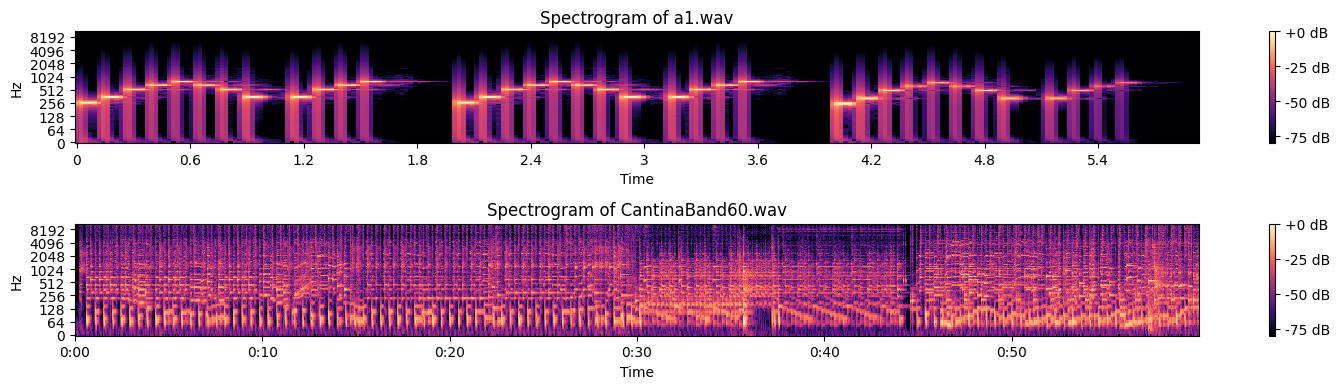

In [26]:
# Loading audio files. y = audio signal / amplitudes, sr = sampling rate
y1, sr1 = librosa.load("a1.wav")
y2, sr2 = librosa.load("CantinaBand60.wav")

# Short-time Fourier transform, to get time and frequency data. abs() to get magnitude from complex values
y1_magnitude = np.abs(librosa.stft(y1))
y1_magnitude = np.abs(librosa.stft(y2))

# Converting to decibel scale. The maximum value will be 0 dB
S1_db = librosa.amplitude_to_db(S1, ref=np.max)
S2_db = librosa.amplitude_to_db(S2, ref=np.max)

plt.figure(figsize=(15, 4))

# Spectrogram for the first audio file
plt.subplot(2, 1, 1)
librosa.display.specshow(S1_db, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of a1.wav')

# Spectrogram for the second audio file
plt.subplot(2, 1, 2)
librosa.display.specshow(S2_db, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of CantinaBand60.wav')

plt.tight_layout()
plt.show()

Exercise 4